#**CSC 219 Project (Final)** - Covid-19 Data Analysis and Visualization


Always make a copy of lecture and sample notebooks in your own drive.
Remember that you have reading resources and this book under Resources on the class page: [enter the location of book here]


# Objectives
In the final project of this course we will wrap up the exploration and analysis of the  Covid-19 data set from Our World In Data.

<br>


# EDA reminder


**Exploratory Data Analysis** is a collection of techniques and a philosophy in data sciences, that is the process of taking a deep look at the data set, understanding its flaws, discovering patterns and outliers, helping frame further analysis and hypothesis building. It will not only uncovering the data's story, but get it ready to tell a story to others, in an effective, fact-based, and visually pleasing way.
* examples of tools used in EDA that should be familiar to you:
 * statistical calculations such as mean, mode, and median
 * frequency distribution plots like histogram and bar graphs
 * analysis/comparison of two variables or sets of data such as scatter plots, heatmaps
 * data cleaning and transformation such as removal and replacement of unknown/undefined data

# Covid data set: Our World In Data
* To understand some of the columns better, feel free to explore Our World in Data's site
* Example: stringency index
  * The stringency index is a composite measure based on nine response indicators including school closures,
workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest)
https://ourworldindata.org/covid-stringency-index

 * https://ourworldindata.org/excess-mortality-covid
-----



# Intro

* Thus far, we've mostly explored, analyzed, and visualized the Covid data features on their own - start date of Covid in each country, start date of vaccination by country, and vaccination uptake numbers
  * What we did was **Univariate Analysis**, which is an EDA category focusing on exploring and understading one variable/feature at a time
  * When we used box plot to visualize the spread of the number of people vaccinated by continent, we used an Univariate Analysis technique
* In this project we will practice Univariate then implement **Bivariate Analysis** to examine the relationship between two features, to explore patterns and the correlation between them -- within the same reduced data set we've been working with. We will continue to work with countries grouped by continent, retain entries that have data for number of people vaccinated and a year after the first vaccine was made available.
  
  * We will use a **heatmap** to visualize the calculated **correlation coefficients**, and use the results to narrow the focus for further exploration and deeper analysis
  

# Correlation matrix

* DataFrame.corr() is a method that calculates correlation coefficients of columns, and excludes NA values by default
* it returns a Dataframe with a correlation matrix
* the **range of correlation coefficient** is -1.0 to 1.0;  
  * -1.0 indicates complete negative correlation
  * 0 is no correlation
  * 1.0 is total positive correlation
  * see table below for how to gauge the strength of the correlation
* the diagonal of the matrix is always 1 as the a variable's correlation with itself is as correlated as you can get
* the correlation matrix is symmetric because it shows linear dependence between two variables and that relationship is the same measured in reverse. See example matrix below



![picture1](https://drive.google.com/uc?export=view&id=1WfzViW2ZRDMNUrvu4-GiW-3tA0gEA-wW)
<br>
**Table 1.** Correlation Coefficient and Relationship Strength - use this as a rule of thumb to interpret the relationship strength based on the coefficient

![picture1](https://drive.google.com/uc?export=view&id=1zvtBko8a3_o43UNxqcpdaEvZpEu2zr0f)
<br>
**Figure 1.** Correlation Coefficient Heatmap - the diagonal will always be 1 and the matrix is symmetric. The interesting data points are the darkest and the lightest; -0.76 for example suggest a strong negative correlation, and 0.69 is moderately correlated and might warrant a closer look

**Figure 2.** Correlation Coefficient Heatmap - countries grouped by continent on Dec 11, 2022, one year after the first vaccine was available to the public

# Prompt 1 and 2. Data Collection

**1.** Data Gathering:
* use the Covid-19 CSV file provided in class, or downloaded from the site, collect the data set and get it ready to work with your code

* Covid data set from Our World In Data
https://github.com/owid/covid-19-data/tree/master/public/data


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
filepath = '/content/drive/MyDrive/CSC219/owid-covid-data.csv'

Mounted at /content/drive/


2. Use Pandas to store and organize the data set

In [ ]:
import pandas as pd

covidDF = pd.read_csv(filepath)
covidDF.head()
covidDF.info()



<ipython-input-4-9abe9048c460>:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  covidDF = pd.read_csv(filepath)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409990 entries, 0 to 409989
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409990 non-null  object 
 1   continent                                   390209 non-null  object 
 2   location                                    409990 non-null  object 
 3   date                                        409990 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-null  float64
 

# Prompt 3. Data reduction and transformation

**3.** Build a dataframe to plot the heatmap of the correlation matrix shown in the example above

Do the following steps:

* reduce the data such that the data set will contain only the columns necessary to obtain the matrix in the example (get the clues from the title and description of the figure, axis, and tick labels)
* drop the records where the value in _continent_ is nan/na, do the same to _people_vaccinated_per_hundred_ as well
* transform the data to the proper dtype to for further operation
* select the date to be '2021-12-11' which is one year after the first vaccine was available to the public
* group the data is  by continent, just like in Module 4 exercises

In [ ]:
'''Your code here'''

In [ ]:
# Reduce the data to necessary columns, will make our
smallcovidDF = covidDF[['continent', 'location', 'date', 'total_deaths_per_million',
                     'total_vaccinations_per_hundred', 'human_development_index',
                     'excess_mortality_cumulative_per_million', 'gdp_per_capita']]

# Drop records with NaN values in 'continent' and 'people_vaccinated_per_hundred'
smallcovidDF = smallcovidDF.dropna(subset=['continent', 'total_vaccinations_per_hundred'])

# Convert date to datetime object, date column cannot be a string any longer!!!
smallcovidDF['date'] = pd.to_datetime(smallcovidDF['date'])

# Select data for '2021-12-11'
smallcovidDF = smallcovidDF[smallcovidDF['date'] == '2022-12-11']

# Group data by continent
covid_cont = smallcovidDF.groupby('continent').mean(numeric_only=True)

covid_cont

,total_deaths_per_million,total_vaccinations_per_hundred,human_development_index,excess_mortality_cumulative_per_million,gdp_per_capita
continent,,,,,
Africa,538.112385,67.869231,0.569692,4662.847000,6369.121077
Asia,512.035900,198.350000,0.801455,1271.329000,27592.044364
Europe,2577.637765,200.321000,0.889062,2848.078646,34759.376375
North America,1783.038000,171.650000,0.841000,3629.147500,34413.153500
Oceania,435.270000,229.990000,0.931000,-104.333560,36085.843000
South America,3913.833000,259.802500,0.809500,3023.484600,17010.275500


In [ ]:
covid_cont.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Africa to South America
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   total_deaths_per_million                 6 non-null      float64
 1   total_vaccinations_per_hundred           6 non-null      float64
 2   human_development_index                  6 non-null      float64
 3   excess_mortality_cumulative_per_million  6 non-null      float64
 4   gdp_per_capita                           6 non-null      float64
dtypes: float64(5)
memory usage: 288.0+ bytes


In [ ]:
#an attempt to drp NaN before talking to prof and changing date in code
covid_cont['excess_mortality_cumulative_per_million'].dropna()


,excess_mortality_cumulative_per_million
continent,
Africa,4662.847000
Asia,1271.329000
Europe,2848.078646
North America,3629.147500
Oceania,-104.333560
South America,3023.484600


# Prompt 4. Plotting Correlation Matrix

* See Figure 2 below for the output of the plot and the code for understanding.
* The code given below uses Pandas, Matplotlib and Seaborn to calculate and plot the correlation matrix between selected columns in the Covid dataset
  * we saw an example of **Seaborn** usage before and here it is in a nutshell: Seaborn is a library built on top of Matplotlib that works very well with Pandas to plot statistical graphics. It helps quickly visualize metrics and features when the data is organized in Pandas data structures (such as Dataframe). You will still need to make particular visual adjustments using **Matplolib** objects and methods (setting titles for example) but it is a great wrapper tool.
  * **Seaborn.heatmap()** takes a dataframe of values and puts it in a plot where the colors reflect the weight of the values within a range. That is, you can easily see the values change in a color gradient
  * to calculate correlation between all columns in a dataframe we use **Pandas.Dataframe.select_dtypes()** below. We are only interested in correlations between data values that are numeric and the argument for it is _include='number'_. It will return a Dataframe containing the correlation coefficients between all numeric columns



```
import matplotlib.pyplot as plt
import seaborn as sns


# select numeric columns from the dataset
numericCols = list(__Your dataframe here__.select_dtypes(include='number'))
print(type(__Your dataframe here__[numericCols].corr()))

# using Matplotlib's method to create a figure canvas
fig = plt.figure(figsize=(12,7))

#Correlation Heatmap: using Seaborn's heatmap plot
# using Panda's dataframe.corr() to calculate all numeric data columns
ax = sns.heatmap(data=__Your dataframe here__[numericCols].corr(),
            annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# using Matplotlib's methods to set titles
ax.set_title('Heatmap of Correlation matrix - by continent',fontsize=24)
plt.suptitle('Dec 11, 2022 - One Year After 1st Vaccine Available', fontsize=18)
plt.show()
```




![picture1](https://drive.google.com/uc?export=view&id=1F8bWy0FRcgqErkXYe1IcEn1l8pfVzVLf)
<br>

**Figure 2.** Correlation Coefficient Heatmap - countries grouped by continent on Dec 11, 2022, _two_ year after the first vaccine was available to the public

**4.** Fill in the dataframe you built in prompt 3 in the given code to plot the correlation heatmap

<class 'pandas.core.frame.DataFrame'>


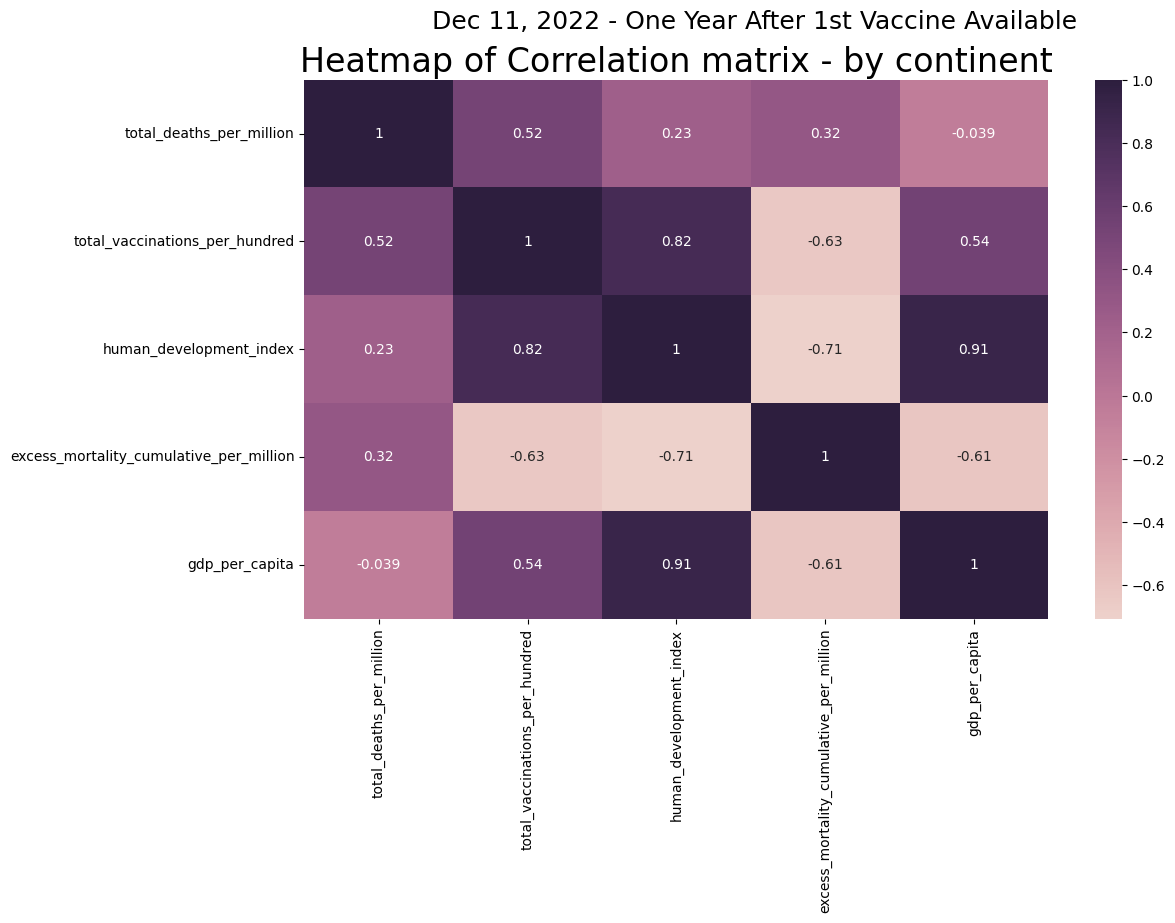

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# select numeric columns from the dataset
#covid_cont was made from a data set called smallcovidDF
#heatmap will look a lot different from example bc of this ^^^
numericCols = list(covid_cont.select_dtypes(include='number'))
print(type(covid_cont[numericCols].corr()))

# using Matplotlib's method to create a figure canvas
fig = plt.figure(figsize=(12,7))

# Correlation Heatmap: using Seaborn's heatmap plot
# using Panda's dataframe.corr() to calculate all numeric data columns
# Heatmap is smaller because I used a subset
ax = sns.heatmap(data=covid_cont[numericCols].corr(),
            annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

# using Matplotlib's methods to set titles
ax.set_title('Heatmap of Correlation matrix - by continent',fontsize=24)
plt.suptitle('Dec 11, 2022 - One Year After 1st Vaccine Available', fontsize=18)
plt.show()

# Correlation Matrix Results

Looking at the results of the correlation heatmap, we can see various interesting relationships, some more surprising than others. We will pick a few of potential moderate and strong correlation to discuss:
 * a. Human Development Index and People Vaccinnated per Hundred scored 0.69, indicating a moderate positive relationship. This could warrant a closer look since it could help understand the mechanisms that contribute to better vaccine uptake
  
 * b. Excess Mortality Cummulative per Million and People Vaccinnated per Hundred scored -0.76, indicating a strong negative correlation. This could confirm that vaccines work, and when more people are vaccinated it helps reduce deaths caused by Covid-19. Graphically, being negatively correlated means when variable goes up the other goes down
 * c. Excess Mortality and Total Deaths per Million are strongly correlated at 0.87. This hints at Covid being responsible for the majority of increases in deaths
 * d. GDP per Capita and People Vaccinnated per Hundred have only a moderate correlation at 0.61. Perhaps that is surprising to some as unfortunately, access to medical care tends to be more available to countries with higher income
<br>
<br>

Let's explore and do further analysis on the data from some of these observations in the next few prompts.

# Prompt 5. Univariate Analysis

We start by looking at the variables Human Development Index (HDI) and People Vaccinnated per Hundred (PVH), before a closer look at their relationship  
* HDI is a well-known index built on the basis that human development is hinged on more than economic growth, but also quality of life, healthy conditions, access to education, and decent standard of living.  
* If a country has high HDI, one might posit that vaccine uptake would also be higher, comparatively


**5.**  Perform data exploration on HDI and PVH, get familiar with these variables and visualize their spreads in box plots


* Reduce the data into a dataframe with minimal number of columns to facilitate exploration on HDI and PVH
* Recall that we are only interested in entries that are of countries and grouping will be by continent. Accordingly, perform the appropriate data clean up

* The date is to Dec 11, 2021

* not necessary, but try plotting both box plots in one figure, side by side. Use subplot as in examples from earlier in the course. See code hints below



```
      fig, axes = plt.subplots(1,2, figsize=(20, 13), sharex=True)
      .
      .
      .
      # plotting on the left
      sns.boxplot(ax=axes[0],.....
      # plotting on the right
      sns.boxplot(ax=axes[1],.....
```      
* also not necessary, but if you want to order the continents on the x-axis, create a groupby filter and set it in boxplot(). See code hints below
```
    # grouping data by continent, and order by HDI median by contient
    groupMedianHDI = someDF.groupby(['continent'])['human_development_index'].median().sort_values(ascending=True)
    sns.boxplot(ax=axes[0],...order=groupMedianHDI.index,....)

```

Sample box plot output:
<br>
![picture1](https://drive.google.com/uc?export=view&id=1IsjGFwvKXHu0pnBDnAktOGJOQS1GzYTH)

<ipython-input-18-7c6f281d4385>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdi_pvh_df['date'] = pd.to_datetime(hdi_pvh_df['date'])


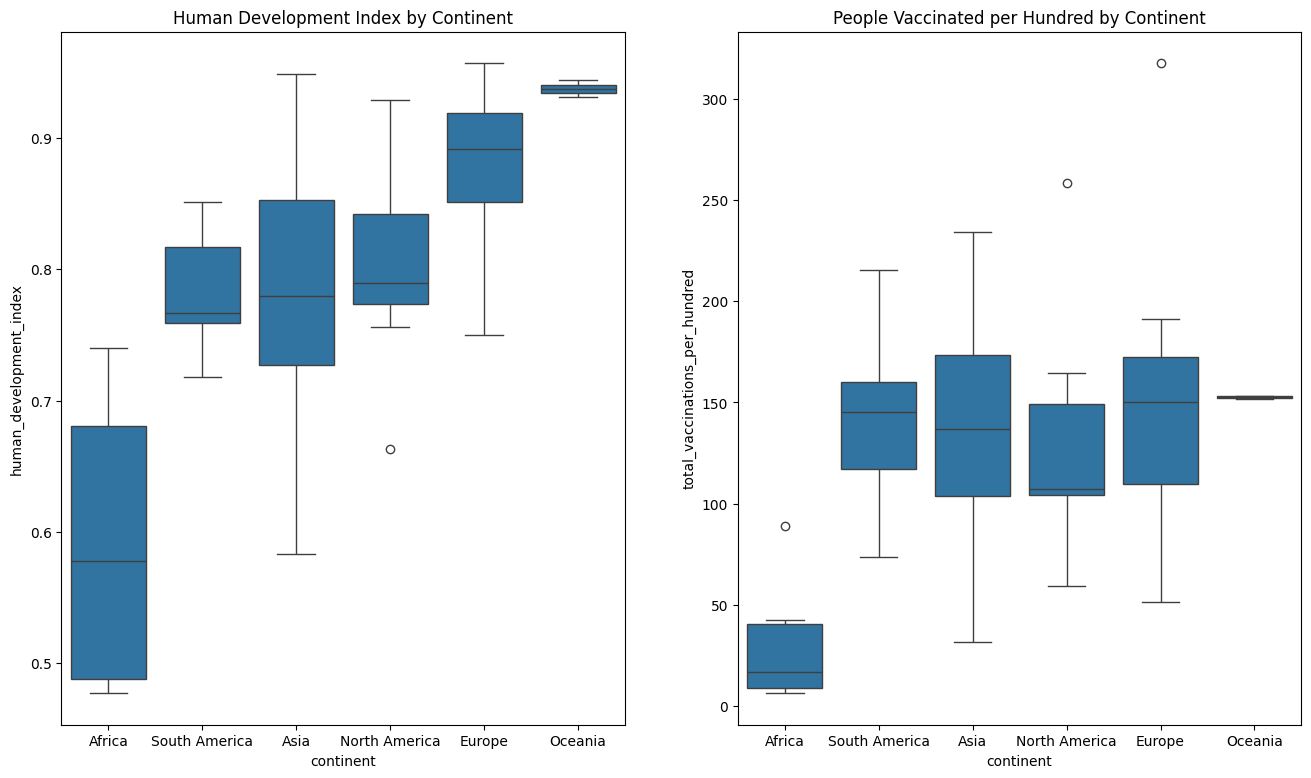

In [ ]:
#I'm going to use the covidDF and make a new subset dataframe
hdi_pvh_df = covidDF[['continent', 'location', 'date', 'human_development_index', 'total_vaccinations_per_hundred']]

# Trying to use dropna in 'continent' and 'total_vaccinations_per_hundred'columns
hdi_pvh_df = hdi_pvh_df.dropna(subset=['continent', 'total_vaccinations_per_hundred'])

# Convert date to datetime object
hdi_pvh_df['date'] = pd.to_datetime(hdi_pvh_df['date'])

# Select data for '2021-12-11'
hdi_pvh_df = hdi_pvh_df[hdi_pvh_df['date'] == '2021-12-11']

# Group data by continent
hdi_pvh_grouped = hdi_pvh_df.groupby('continent').mean(numeric_only=True)
#.mean()and boolean makes it so the .mean() method is applied to the numeric columns
#could also print whole thing without the means
#hdi_pvh_grouped = hdi_pvh_df.groupby('continent')
#hdi_pvh_grouped

# creates a figure and two subplots using matplot library
#creates figure and an array, or list of axes objects.
#1 and 2 specify that we want a 1*2 grid
# the fig size in inches
#we can set sharex as true so that the x axis is shared between the two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharex=True)

# group data in the hdi_pvh_df dataframe by the continent column and selects the HDI column for each group
#we can order the medians from lower to higher
groupMedianHDI = hdi_pvh_df.groupby(['continent'])['human_development_index'].median().sort_values(ascending=True)
#creates boxplot using seaborn library
#we need to indicate which data frame we're using and ax means that we are plotting ont the first subplot
sns.boxplot(ax=axes[0], data=hdi_pvh_df, x='continent', y='human_development_index', order=groupMedianHDI.index)
axes[0].set_title('Human Development Index by Continent')

# Order continents by PVH median
groupMedianPVH = hdi_pvh_df.groupby(['continent'])['total_vaccinations_per_hundred'].median().sort_values(ascending=True)
#as you can see our axes changed because we're plotting on second subplot for total vax
sns.boxplot(ax=axes[1], data=hdi_pvh_df, x='continent', y='total_vaccinations_per_hundred', order=groupMedianPVH.index)
axes[1].set_title('People Vaccinated per Hundred by Continent')

#goal to change the color of the boxplot




plt.show()

# Prompt 6. Bivariate Analysis

Now, let's look at the correlation between the two features, HDI and PVH. One way to visualize that relationship is to use a scatter plot, and draw a line of best fit on it. The latter is a straight line and helps us see the trend of the data points


# Correlation between the two features

**6.** Calculate the correlation coefficient, and plot a scatter plot to visualize the relationship between HDI and PVH



```
  correlationCoef = Dataframe['column name'].corr(Dataframe['another coloumn name'])
```
* for the scatter plot, if you're using Seaborn.scatter() try out these arguments:
  * style='continent' - this will change the style/shape of the markers
  * hue='continent',
  * s=100

* comment on the correlation between the two features

Sample correlation scatter plot:
<br>
![picture1](https://drive.google.com/uc?export=view&id=1M-CLuRUiyGen1RNKa7QR4ZLtmOs00ZCX)
<br>

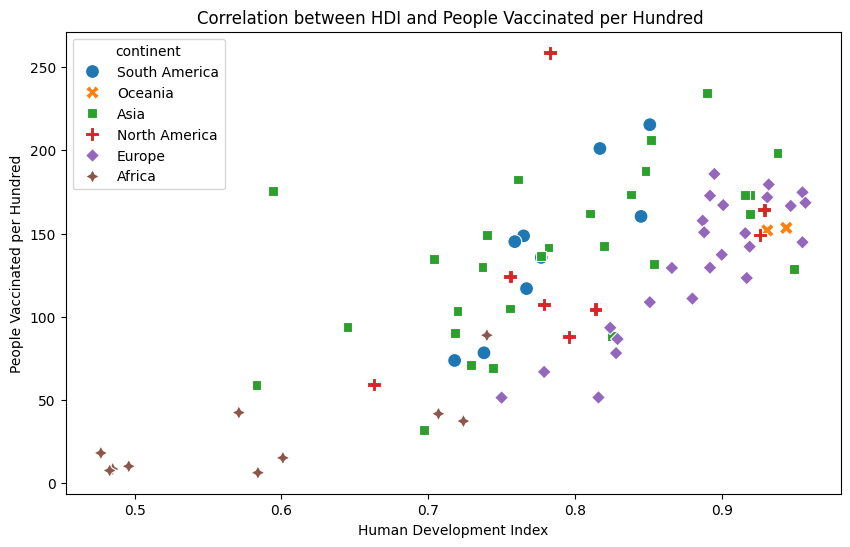

In [ ]:
#we want to seletct the columns needed and assign them to new variable
#.corr() method used in Pandas that calculates the correlation coefficient between two sets of data
corr_coeff_hdi_pvh = hdi_pvh_df['human_development_index'].corr(hdi_pvh_df['total_vaccinations_per_hundred'])
corr_coeff_hdi_pvh

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#set x and y
#style to make different shapes and distinguish data from different continents
#hue will change color based on continent
#s is the size of the markers for the scatter plot
sns.scatterplot(data=hdi_pvh_df, x='human_development_index', y='total_vaccinations_per_hundred', style='continent', hue='continent', s=100)
plt.title('Correlation between HDI and People Vaccinated per Hundred ')
plt.xlabel('Human Development Index')
plt.ylabel('People Vaccinated per Hundred')
plt.show()


# Prompt 7. Another correlation analysis

Another correlation coefficient noted earlier, from Correlation Matrix Results was that of Excess Mortality Cummulative per Million and People Vaccinnated per Hundred. Explore and analyse these features separately and together.

**7.** Repeat prompts 5 and 6 for  Excess Mortality Cummulative per Million and People Vaccinnated per Hundred

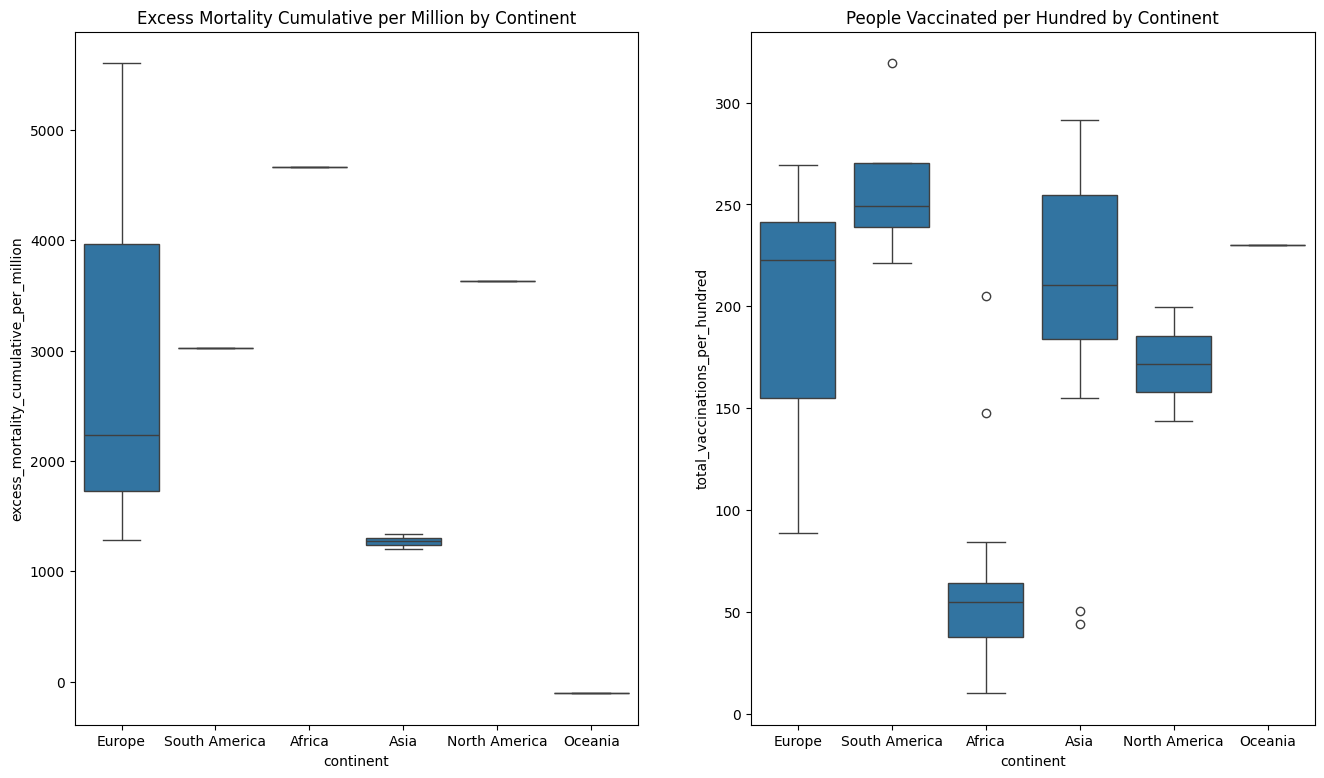

In [ ]:
emc_pvh_df = covidDF[['continent', 'location', 'date', 'excess_mortality_cumulative_per_million', 'total_vaccinations_per_hundred']]

# Trying to use dropna in 'continent' and 'total_vaccinations_per_hundred'columns
emc_pvh_df = emc_pvh_df.dropna(subset=['continent', 'total_vaccinations_per_hundred'])

# Convert date to datetime object
emc_pvh_df['date'] = pd.to_datetime(emc_pvh_df['date'])

# Select data for '2021-12-11'
emc_pvh_df = emc_pvh_df[emc_pvh_df['date'] == '2022-12-11']

# Group data by continent
emc_pvh_grouped = emc_pvh_df.groupby('continent').mean(numeric_only=True)
#.mean()and boolean makes it so the .mean() method is applied to the numeric columns
#could also print whole thing without the means


# creates a figure and two subplots using matplot library
#creates figure and an array, or list of axes objects.
#1 and 2 specify that we want a 1*2 grid
# the fig size in inches
#we can set sharex as true so that the x axis is shared between the two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharex=True)

# group data in the emc_pvh_df dataframe by the continent column and selects the EMC column for each group
#we can order the medians from lower to higher
groupMedianEMC = emc_pvh_df.groupby(['continent'])['excess_mortality_cumulative_per_million'].median().sort_values(ascending=True)
#creates boxplot using seaborn library
#we need to indicate which data frame we're using and ax means that we are plotting ont the first subplot
sns.boxplot(ax=axes[0], data=emc_pvh_df, x='continent', y='excess_mortality_cumulative_per_million')
axes[0].set_title('Excess Mortality Cumulative per Million by Continent')

# Order continents by EMC median
groupMedianPVH = emc_pvh_df.groupby(['continent'])['total_vaccinations_per_hundred'].median().sort_values(ascending=True)
#as you can see our axes changed because we're plotting on second subplot for total vax
sns.boxplot(ax=axes[1], data=emc_pvh_df, x='continent', y='total_vaccinations_per_hundred', order=groupMedianPVH.index)
axes[1].set_title('People Vaccinated per Hundred by Continent')

#goal to change the color of the boxplot




plt.show()

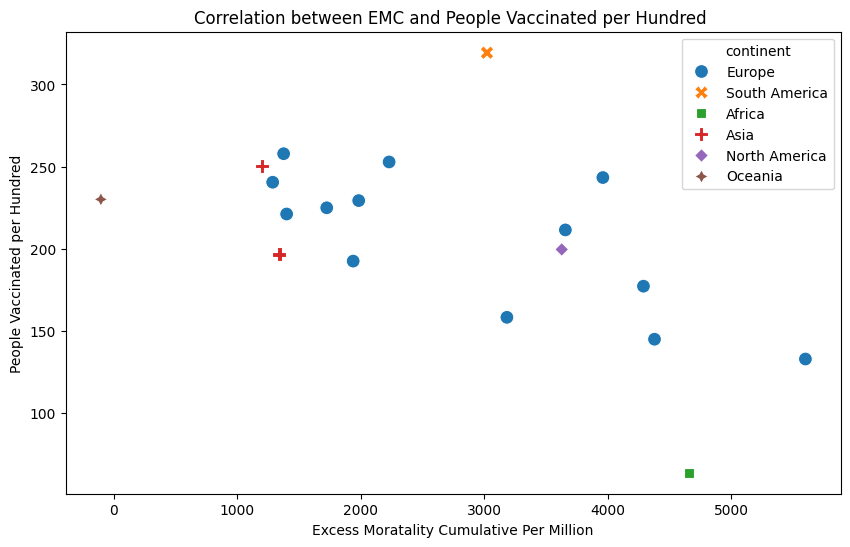

In [ ]:
corr_coeff_emc_pvh = emc_pvh_df['excess_mortality_cumulative_per_million'].corr(emc_pvh_df['total_vaccinations_per_hundred'])
corr_coeff_emc_pvh

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#set x and y
#style to make different shapes and distinguish data from different continents
#hue will change color based on continent
#s is the size of the markers for the scatter plot
sns.scatterplot(data=emc_pvh_df, x='excess_mortality_cumulative_per_million', y='total_vaccinations_per_hundred', style='continent', hue='continent', s=100)
plt.title('Correlation between EMC and People Vaccinated per Hundred ')
plt.xlabel('Excess Moratality Cumulative Per Million')
plt.ylabel('People Vaccinated per Hundred')
plt.show()